In [298]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
import sklearn

In [299]:
df = pd.read_csv('2018_public_use_data.csv')
print(df.shape)
df.dtypes

(6436, 1181)


PUBID      int64
REGION     int64
CENDIV     int64
PBA        int64
SQFT       int64
           ...  
ZTINT      int64
ZREFL      int64
ZAWN       int64
ZSKYLT     int64
ZDAYLTP    int64
Length: 1181, dtype: object

In [300]:
df.sample(5)

,PUBID,REGION,CENDIV,PBA,SQFT,SQFTC,WLCNS,RFCNS,RFCOOL,RFTILT,...,ZLTEXPC,ZPKLT,ZPKLTINOUT,ZPKLTN,ZWINTYP,ZTINT,ZREFL,ZAWN,ZSKYLT,ZDAYLTP
4485,4486,2,3,26,2500,2,5,5,2,3,...,0,0,9,9,0,0,0,0,0,0
554,555,1,2,18,190000,7,1,1,2,1,...,0,0,9,9,0,0,0,0,0,0
1872,1873,3,5,4,350000,8,6,1,1,2,...,0,0,9,9,0,0,0,0,0,0
4577,4578,3,6,2,3200,2,4,4,2,3,...,0,0,9,9,0,0,0,0,0,0
3930,3931,3,5,23,45500,5,1,6,2,1,...,1,1,1,1,0,1,1,0,0,1


In [301]:
df_codebook = pd.read_csv('2018cbecs_codebook_wDicts.csv')
df_codebook.head()

,category,file_order,col_name,col_type,length,col_description,codes,codes_dict
0,0,1,PUBID,Char,5,Public use file building identifier,00001 - 06436,{'00001 - 06436': 'continuous numerical range'}
1,0,2,REGION,Char,1,Census Region,1=Northeast\n2=Midwest\n3=South\n4=West,"{'1': 'Northeast', '2': 'Midwest', '3': 'South..."
2,0,3,CENDIV,Char,1,Census division,1=New England\n2=Middle Atlantic \n3=East Nor...,"{'1': 'New England', '2': 'Middle Atlantic', '..."
3,0,4,PBA,Num,8,Principal building activity,1=Vacant\n2=Office\n4=Laboratory\n5=Nonrefrige...,"{'1': 'Vacant', '2': 'Office', '4': 'Laborator..."
4,1,5,SQFT,Num,8,Square footage,"1,001 - 2,100,000","{'1,001 - 2,100,000': 'continuous numerical ra..."


In [302]:
print(df_codebook.category.unique())

[0 1 2 3 4 5 6 7]


In [303]:
df_codebook_2012 = pd.read_csv('2012cbecs_codebook_wDicts.csv')
df_codebook_2012.head()

,category,file_order,col_name,col_type,length,format,col_description,codes,codes_dict
0,0,1.0,PUBID,Char,5.0,NaN,Building identifier,00001 - 06720,{'00001 - 06720': 'continuous numerical range'}
1,0,2.0,REGION,Char,1.0,$REGION.,Census region,'1' = 'Northeast'\r\n'2' = 'Midwest'\r\n'3' = ...,"{'1': 'Northeast', '2': 'Midwest', '3': 'South..."
2,0,3.0,CENDIV,Char,1.0,$CENDIV.,Census division,'1' = 'New England'\r\n'2' = 'Middle Atlantic'...,"{'1': 'New England', '2': 'Middle Atlantic', '..."
3,0,4.0,PBA,Char,2.0,$PBA.,Principal building activity,'01' = 'Vacant'\r\n'02' = 'Office'\r\n'04' = '...,"{'01': 'Vacant', '02': 'Office', '04': 'Labora..."
4,1,5.0,FREESTN,Char,1.0,$YES.,Freestanding building,1' = 'Yes'\r\nMissing='No',"{'1': 'Yes', 'Missing': 'No'}"


In [304]:
col_name_2012 = df_codebook_2012.col_name.values.tolist()
col_name_2018 = df_codebook.col_name.values.tolist()

In [305]:
keep_var = df_codebook[df_codebook['col_name'].isin(col_name_2012)]
keep_var.shape

## 330 overlapping variables 

(330, 8)

In [306]:
keep_var_list = keep_var.col_name.values.tolist()

In [307]:
## Read 2012 Data

df_2012 = pd.read_csv('2012cbecs_train-data.csv')
df_2012_cons = pd.read_csv('2012cbecs_consumption-data.csv')

In [308]:
df_2012.sample(5)

,PUBID,REGION,CENDIV,PBA,SQFT,NFLOOR,BASEMNT,FLCEILHT,NELVTR,NESLTR,...,TRIM,PLGCTRL,DRLGHT,LTEXPC,PKLT,WINTYP,TINT,REFL,AWN,SKYLT
3712,3713,2,3,26,2100,1,0.0,11,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,3,0.0,0.0,0.0,0.0
3443,3444,3,5,23,32000,2,0.0,12,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,3,1.0,1.0,1.0,0.0
4664,4665,1,2,14,106000,5,0.0,20,0.0,0.0,...,0.0,0.0,0.0,4.0,1.0,1,0.0,0.0,0.0,0.0
5771,5772,4,9,15,2200,1,0.0,12,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,4,0.0,0.0,0.0,0.0
620,621,3,7,26,5000,1,0.0,20,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,4,0.0,0.0,0.0,0.0


In [309]:
df_2012 = df_2012[df_2012.columns.intersection(keep_var_list)]
df_2012.shape

(6720, 330)

In [310]:
df_2012_cons.sample(5)

,HDD65,CDD65,MFHTBTU,MFCLBTU,MFVNBTU,MFWTBTU,MFLTBTU,MFCKBTU,MFRFBTU,MFOFBTU,...,MFUSED,DHUSED,DHHT1,DHHT2,DHCOOL,DHCOOK,DHWATR,DHMANU,DHOTH,PUBCLIM
3381,2188,1847,0.0,0.0,0.0,0.0,33430.0,0.0,0.0,0.0,...,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1354,6254,955,1479628.0,149290.0,507950.0,414556.0,365269.0,402921.0,828738.0,35757.0,...,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3297,3314,1483,41369.0,40591.0,79683.0,1717.0,232328.0,0.0,0.0,17616.0,...,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
5717,6776,617,1249373.0,2449.0,13020.0,40181.0,26045.0,0.0,6998.0,6810.0,...,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3936,1121,4308,0.0,231850.0,11561.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


EDA Consumption 

In [311]:
col_list = ['MFHTBTU',
'MFCLBTU',
'MFVNBTU',
'MFWTBTU',
'MFLTBTU',
'MFCKBTU',
'MFRFBTU',
'MFOFBTU',
'MFPCBTU',
'MFOTBTU',
'ELHTBTU',
'ELCLBTU',
'ELVNBTU',
'ELWTBTU',
'ELLTBTU',
'ELCKBTU',
'ELRFBTU',
'ELOFBTU',
'ELPCBTU',
'ELOTBTU',
'NGHTBTU',
'NGCLBTU',
'NGWTBTU',
'NGCKBTU',
'NGOTBTU',
'FKHTBTU',
'FKCLBTU',
'FKWTBTU',
'FKCKBTU',
'FKOTBTU',
'DHHTBTU',
'DHCLBTU',
'DHWTBTU',
'DHCKBTU',
'DHOTBTU']
df_2012_cons['total_consumption'] = df_2012_cons[col_list].sum(axis=1)
df_2012_cons['energy_intensity'] = df_2012_cons['total_consumption']/df_2012['SQFT']

In [312]:
df_2012_cons[['energy_intensity']]

,energy_intensity
0,22.445000
1,103.327579
2,30.504314
3,193.748856
4,127.789600
...,...
6715,139.291037
6716,4.058824
6717,480.222000
6718,143.811844


In [315]:
df_2012_cons['energy_intensity'].describe()

count    6720.000000
mean      198.180262
std       244.238403
min         0.000000
25%        62.571310
50%       125.946176
75%       235.970617
max      2680.388000
Name: energy_intensity, dtype: float64

In [330]:
df_2012_cons[df_2012_cons['energy_intensity']==0].sample(5)

,HDD65,CDD65,MFHTBTU,MFCLBTU,MFVNBTU,MFWTBTU,MFLTBTU,MFCKBTU,MFRFBTU,MFOFBTU,...,DHHT1,DHHT2,DHCOOL,DHCOOK,DHWATR,DHMANU,DHOTH,PUBCLIM,total_consumption,energy_intensity
6114,7580,494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0
1120,8199,830,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0
5450,982,3190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,0.0
1384,2386,2110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0
6212,2595,1939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0


In [329]:
df_2012_total = df_2012.join(df_2012_cons)
df_2012_total.sample(5)

,PUBID,REGION,CENDIV,PBA,SQFT,NFLOOR,BASEMNT,FLCEILHT,NELVTR,NESLTR,...,DHHT1,DHHT2,DHCOOL,DHCOOK,DHWATR,DHMANU,DHOTH,PUBCLIM,total_consumption,energy_intensity
2865,2866,3,5,2,84000,4,0.0,10,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,15290872.0,182.034190
612,613,3,7,8,150000,5,0.0,9,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,79794308.0,531.962053
5295,5296,3,5,16,1400000,7,1.0,9,19.0,2.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,7,395809214.0,282.720867
826,827,4,8,2,6300,2,0.0,12,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,242640.0,38.514286
4689,4690,1,2,26,91000,2,0.0,20,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,945800.0,10.393407


In [333]:
df_renov = df_2012_total[df_2012_total['RENOV']==1]
df_renov.sample(5)

,PUBID,REGION,CENDIV,PBA,SQFT,NFLOOR,BASEMNT,FLCEILHT,NELVTR,NESLTR,...,DHHT1,DHHT2,DHCOOL,DHCOOK,DHWATR,DHMANU,DHOTH,PUBCLIM,total_consumption,energy_intensity
573,574,3,5,2,172000,20,3.0,8,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,27922896.0,162.342419
3648,3649,3,5,16,600000,9,0.0,12,13.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,51934288.0,86.557147
2501,2502,2,3,2,142000,12,1.0,10,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,23789432.0,167.531211
1942,1943,1,2,17,128000,4,1.0,12,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,31331016.0,244.773562
1565,1566,1,2,16,300000,7,1.0,8,14.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,50374300.0,167.914333


In [335]:
df_renov['energy_intensity'].describe()

count    3423.000000
mean      219.517159
std       241.544900
min         0.000000
25%        81.355756
50%       144.388000
75%       269.661014
max      2225.598095
Name: energy_intensity, dtype: float64

In [ ]:
## look at specific renovations? in theory should be lower

In [228]:
category_map = {}
for cat in df_codebook.category.unique():
    category_cols_df = df_codebook[df_codebook['category'] == cat]
    cat_cols = []
    for col in category_cols_df.col_name.values:
        if type(col) == str:
            cat_cols.append(col)
    category_map[cat] = cat_cols

In [229]:
keep_cols = []
for wanted_cols in category_map.values():
    for col in wanted_cols:
        keep_cols.append(col)
print(len(keep_cols))

561


## EDA

Separated by Category (1-7, 10)

In [230]:
def find_num_cat_cols(list_of_dfs, category_num, list_of_numcols, list_of_catcols):
    numeric_cols = []
    categorical_cols = []
    for col in list_of_dfs[category_num].columns:
        if col in list_of_numcols:
            numeric_cols.append(col)
        elif col in list_of_catcols:
            categorical_cols.append(col)
    df_category = list_of_dfs[category_num].copy()[numeric_cols + categorical_cols]
    return df_category, numeric_cols, categorical_cols

In [231]:
def create_new_codebook(codebook, cols):
    new_codebook = dict(codebook.set_index('col_name').loc[cols].codes_dict)
    return new_codebook

In [232]:
def create_replace_map(new_codebook, category_df, return_errors=False):
    replace_map = {}
    error_map = {}
    for col_name, codebook in new_codebook.items():
        try:
            codebook = json.loads(codebook.replace("'", '"'))
        except ValueError as e:
            print(f'JSONDecodeError on column {col_name}')
            error_map[col_name] = (col_name, e)
            codebook = codebook.replace('"', '')
            codebook = json.loads(codebook.replace("'", '"'))
        finally:
            if col_name in category_df.columns:
                for code, code_val in codebook.items():
                    if code == '2' and code_val == 'No':
                        replace_map[col_name] = 2
    
    if return_errors == True:
        return replace_map, error_map
    else:
        return replace_map

In [233]:
def build_hist(column_list):
    figname = 0
    for column in column_list:
        plt.figure(figname)
        sns.set(rc = {'figure.figsize':(2,2)})
        sns.histplot(data=df, x=column, kde=True)
        figname += 1

In [234]:
df = df[keep_cols]
print(df.shape)
df.sample(5)

(6436, 561)


,PUBID,REGION,CENDIV,PBA,SQFT,SQFTC,WLCNS,RFCNS,RFCOOL,RFTILT,...,LTEXPC,PKLT,PKLTINOUT,PKLTN,WINTYP,TINT,REFL,AWN,SKYLT,DAYLTP
2816,2817,3,6,5,80000,6,1,6,1,2,...,4,1,2,150,3,1,2,1,2,0
5859,5860,1,2,2,10500,4,3,6,2,1,...,1,1,2,10,2,2,2,2,2,5
5525,5526,1,2,14,420000,8,2,1,1,1,...,2,2,.,5,2,1,2,2,2,40
548,549,3,5,13,2600,2,1,4,2,3,...,1,2,.,5,3,2,2,2,2,90
6229,6230,4,9,16,225000,8,1,6,1,1,...,3,1,2,400,3,2,1,2,2,15


In [235]:
## Adjusting for weird values

df.NFLOOR.replace(to_replace=994, value=10, inplace=True)
df.NFLOOR.replace(to_replace=995, value=15, inplace=True)
df.BASEMNT.replace(to_replace=995, value=5, inplace=True)
df.FLCEILHT.replace(to_replace=995, value=51, inplace=True)
df.NELVTR.replace(to_replace=995, value=31, inplace=True)
df.NESLTR.replace(to_replace=995, value=11, inplace=True)
df.RWSEAT.replace(to_replace=99995, value=2001, inplace=True)
df.PBSEAT.replace(to_replace=999995, value=15001, inplace=True)
df.HCBED.replace(to_replace=9995, value=251, inplace=True)
df.NRSBED.replace(to_replace=9995, value=251, inplace=True)
df.LODGRM.replace(to_replace=99995, value=1001, inplace=True)
df.NOCC.replace(to_replace=996, value=0, inplace=True) 
df.NOCCAT.replace (to_replace=996, value=0, inplace=True) 
df.XRAYN.replace(to_replace=995, value=21, inplace=True)
df.LGOFFDEVN.replace(to_replace=9995, value=501, inplace=True) # new var
df.SMOFFDEVN.replace(to_replace=9995, value=501, inplace=True) # new var
df.WBOARDSN.replace(to_replace=9995, value=201, inplace=True) # new var
df.TVVIDEON.replace(to_replace=995, value=201, inplace=True) 
df.RFGCOMPN.replace(to_replace=9995, value=1001, inplace=True)
df.RFGRSN.replace(to_replace=99995, value=1001, inplace=True)
df.SERVERN.replace(to_replace=9995, value=501, inplace=True)


## Not the same as 2012
# df.YRCON.replace(to_replace=995, value=1945, inplace=True) -- diff formulation
# df.ELLUPCT.replace(to_replace=999, value=None, inplace=True) -- var not exist in 2018
# df.WOEXP.replace(to_replace=999999, value=None, inplace=True) -- diff formulation

In [236]:
category_dfs = {}
for cat_name, cat_list in category_map.items():
    category_dfs[cat_name] = df[cat_list]
category_dfs[0].sample(10)

,PUBID,REGION,CENDIV,PBA
2121,2122,4,9,91
2583,2584,3,5,25
1056,1057,1,2,14
619,620,2,3,14
1213,1214,3,5,7
391,392,1,1,2
2104,2105,2,3,14
305,306,2,4,2
591,592,4,9,23
2366,2367,2,4,26


In [237]:
codebook_check = df_codebook.copy().set_index('col_name')
num_cols = []
cat_cols = []
for col in codebook_check.index:
    if codebook_check.loc[col].col_type == 'Num':
        num_cols.append(col)
    else:
        cat_cols.append(col)
print(len(num_cols))
print(len(cat_cols))

558
3


In [238]:
df = df[df.columns.intersection(keep_var_list)]
df.shape

(6436, 330)

In [239]:
df.sample(5)

,PUBID,REGION,CENDIV,PBA,SQFT,SQFTC,WLCNS,RFCNS,RFCOOL,RFTILT,...,PLGCTRL,DRLGHT,LTEXPC,PKLT,WINTYP,TINT,REFL,AWN,SKYLT,DAYLTP
2259,2260,3,5,6,80000,6,1,8,2,2,...,2,2,3,1,2,1,2,1,1,20
2670,2671,3,7,5,500000,8,3,5,2,2,...,2,2,2,1,2,1,2,2,2,10
4418,4419,4,9,5,365000,8,2,1,2,1,...,2,1,4,1,1,1,2,2,2,25
5517,5518,3,7,13,27500,5,1,6,1,1,...,2,1,4,1,2,1,2,2,2,1
552,553,3,5,5,425000,8,3,6,1,1,...,2,2,3,2,1,2,2,1,2,0


Missing Values

In [240]:
df_codebook = create_new_codebook(df_codebook, list(df.columns))
replace_map, error_map = create_replace_map(df_codebook, df, return_errors=True)
print(error_map)

JSONDecodeError on column BLDSHP
JSONDecodeError on column WTHTEQ
{'BLDSHP': ('BLDSHP', JSONDecodeError("Expecting ',' delimiter: line 1 column 127 (char 126)")), 'WTHTEQ': ('WTHTEQ', JSONDecodeError("Expecting ',' delimiter: line 1 column 43 (char 42)"))}


In [241]:
df_filled = df.replace(to_replace=replace_map, value=0).fillna(value=0)
df_filled = df_filled.replace(to_replace='.', value=0)
df_filled[0:20]

,PUBID,REGION,CENDIV,PBA,SQFT,SQFTC,WLCNS,RFCNS,RFCOOL,RFTILT,...,PLGCTRL,DRLGHT,LTEXPC,PKLT,WINTYP,TINT,REFL,AWN,SKYLT,DAYLTP
0,1,3,5,2,210000,8,1,4,0,1,...,2,2,2,1,2,2,2,2,1,0
1,2,4,9,2,28000,5,1,6,1,1,...,2,2,1,1,1,1,1,2,1,15
2,3,3,5,8,2100,2,1,4,0,3,...,2,2,4,1,2,2,2,1,2,40
3,4,3,7,5,240000,8,2,6,1,1,...,2,2,2,1,2,1,2,2,2,5
4,5,1,2,5,295000,8,3,6,0,1,...,2,2,4,1,2,1,2,2,1,0
5,6,3,5,14,94000,6,1,6,1,1,...,2,2,4,1,2,2,2,2,2,20
6,7,4,8,14,41000,5,1,4,1,1,...,2,2,1,1,2,1,2,2,2,75
7,8,2,3,5,122000,7,1,6,1,1,...,1,2,4,1,3,2,2,1,2,0
8,9,4,8,25,96000,6,3,6,1,1,...,2,2,3,1,1,1,2,2,2,40
9,10,1,2,14,220000,8,1,1,0,1,...,2,2,4,1,2,1,2,1,2,10


# PCA

In [254]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

lr = LinearRegression()
scaler_train = StandardScaler()
pca_train = PCA()

X_train = df_2012.to_numpy(dtype=float, copy=True)
X_train_scaled = scaler_train.fit_transform(X_train)
X_train_pca = pca_train.fit_transform(X_train_scaled)

In [255]:
pca_exp_var = pd.DataFrame(pca_train.explained_variance_ratio_,)
pca_exp_var.T

,0,1,2,3,4,5,6,7,8,9,...,320,321,322,323,324,325,326,327,328,329
0,0.107165,0.033453,0.023745,0.020782,0.020388,0.01831,0.016443,0.015666,0.015183,0.013235,...,5.498940e-34,5.498940e-34,5.498940e-34,5.498940e-34,5.498940e-34,5.498940e-34,5.498940e-34,5.498940e-34,5.498940e-34,2.466195e-34


Text(0, 0.5, 'cumulative explained variance')

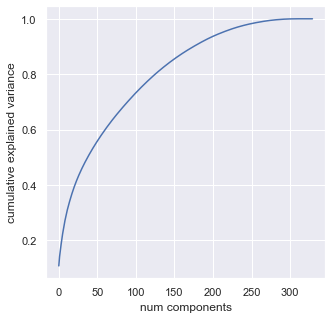

In [256]:
plt.figure(figsize=(5,5))
plt.plot(np.cumsum(pca_train.explained_variance_ratio_))
plt.xlabel('num components')
plt.ylabel('cumulative explained variance')

<AxesSubplot:xlabel='0', ylabel='1'>

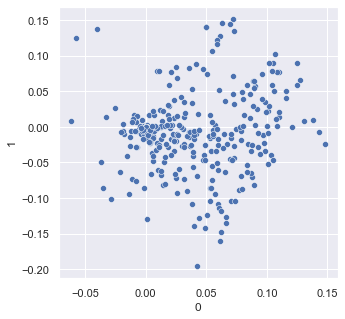

In [257]:
pca_train_df = pd.DataFrame(pca_train.components_)
sns.set(rc = {'figure.figsize':(5,5)})
sns.scatterplot(x=pca_train_df.T[0], y=pca_train_df.T[1])

In [258]:
## PCA on 2018 data

X_test = df_filled.to_numpy(dtype=float, copy=True)
X_test_scaled = scaler_train.transform(X_test)
X_test_pca = pca_train.transform(X_test_scaled)

In [259]:
pca_exp_var_2018 = pd.DataFrame(pca_train.explained_variance_ratio_,)
pca_exp_var_2018.T

,0,1,2,3,4,5,6,7,8,9,...,320,321,322,323,324,325,326,327,328,329
0,0.107165,0.033453,0.023745,0.020782,0.020388,0.01831,0.016443,0.015666,0.015183,0.013235,...,5.498940e-34,5.498940e-34,5.498940e-34,5.498940e-34,5.498940e-34,5.498940e-34,5.498940e-34,5.498940e-34,5.498940e-34,2.466195e-34


Text(0, 0.5, 'cumulative explained variance')

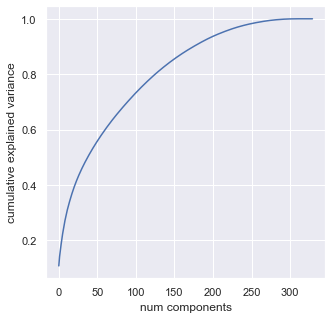

In [260]:
plt.figure(figsize=(5,5))
plt.plot(np.cumsum(pca_train.explained_variance_ratio_))
plt.xlabel('num components')
plt.ylabel('cumulative explained variance')

<AxesSubplot:xlabel='0', ylabel='1'>

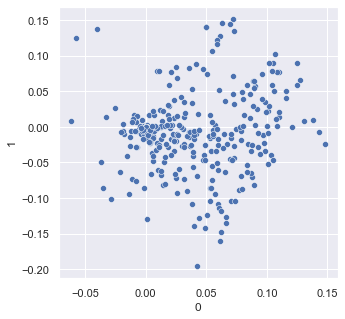

In [261]:
pca_test_df = pd.DataFrame(pca_train.components_)
sns.set(rc = {'figure.figsize':(5,5)})
sns.scatterplot(x=pca_test_df.T[0], y=pca_test_df.T[1])

In [262]:
col_list = ['MFHTBTU',
'MFCLBTU',
'MFVNBTU',
'MFWTBTU',
'MFLTBTU',
'MFCKBTU',
'MFRFBTU',
'MFOFBTU',
'MFPCBTU',
'MFOTBTU',
'ELHTBTU',
'ELCLBTU',
'ELVNBTU',
'ELWTBTU',
'ELLTBTU',
'ELCKBTU',
'ELRFBTU',
'ELOFBTU',
'ELPCBTU',
'ELOTBTU',
'NGHTBTU',
'NGCLBTU',
'NGWTBTU',
'NGCKBTU',
'NGOTBTU',
'FKHTBTU',
'FKCLBTU',
'FKWTBTU',
'FKCKBTU',
'FKOTBTU',
'DHHTBTU',
'DHCLBTU',
'DHWTBTU',
'DHCKBTU',
'DHOTBTU']
y_train = pd.DataFrame(df_2012_cons[col_list].sum(axis=1))
y_train.sample(5)

,0
2484,7994034.0
3818,100724622.0
3235,28770398.0
5566,9315184.0
6053,1851256.0


In [270]:
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)

In [271]:
# y_train_scaled = scaler_train.transform(y_train)
# y_train_pca = pca_train.fit_transform(y_train_scaled)

In [272]:
lr.fit(X_train_pca, y_train_scaled)
y_pred = lr.predict(X_test_pca)

In [273]:
y_pred

array([[4.34456593e+14],
       [3.34907107e+14],
       [4.62403905e+14],
       ...,
       [4.58993334e+14],
       [4.63104732e+14],
       [4.40450548e+14]])

In [282]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import absolute
from numpy import sqrt

In [280]:
X_train_pca2 = X_train_pca.copy()
y_train_scaled2 = y_train_scaled.copy()
X_test_pca2 = X_test_pca.copy()

In [286]:
cv = KFold(n_splits=5, random_state=1, shuffle=True)

In [289]:
scores = cross_val_score(lr, X_train_pca2, y_train_scaled2, scoring='neg_mean_squared_error',cv=cv, n_jobs=-1)

In [290]:
sqrt(mean(absolute(scores)))

120640484.88090698

In [292]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)

In [293]:
print("Cross-validation scores:\n{}".format(cross_val_score(lr, X_train_pca2, y_train_scaled2, cv=kfold)))

Cross-validation scores:
[ 7.30944026e-01 -1.42257798e+22 -1.10717489e+25]
